In [1]:
# extracting the compressed dataset | Dataset - https://www.kaggle.com/datasets/dhirensk/cats-vs-dogs-training8000test2000
from zipfile import ZipFile

data = '/content/Dogs vs Cats.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Extraction Successful')

Extraction Successful


In [2]:
import os
# counting the number of files in cats folder
path, dirs, files = next(os.walk('/content/dataset/training_set/cats'))
cat_files_count = len(files)
print('Number of cat images: ', cat_files_count)

# counting the number of files in dogs folder
path, dirs, files = next(os.walk('/content/dataset/training_set/dogs'))
dog_files_count = len(files)
print('Number of dog images: ', dog_files_count)

Number of cat images:  4000
Number of dog images:  4000


In [3]:
cat_file_names = os.listdir('/content/dataset/training_set/cats')
print(cat_file_names)

dog_file_names = os.listdir('/content/dataset/training_set/dogs')
print(dog_file_names)

['cat.3321.jpg', 'cat.1783.jpg', 'cat.3715.jpg', 'cat.181.jpg', 'cat.1127.jpg', 'cat.1574.jpg', 'cat.2119.jpg', 'cat.3763.jpg', 'cat.3140.jpg', 'cat.3049.jpg', 'cat.1441.jpg', 'cat.717.jpg', 'cat.58.jpg', 'cat.1526.jpg', 'cat.346.jpg', 'cat.3791.jpg', 'cat.2421.jpg', 'cat.804.jpg', 'cat.2046.jpg', 'cat.3718.jpg', 'cat.1360.jpg', 'cat.742.jpg', 'cat.1423.jpg', 'cat.1748.jpg', 'cat.2997.jpg', 'cat.363.jpg', 'cat.3865.jpg', 'cat.3778.jpg', 'cat.2498.jpg', 'cat.2580.jpg', 'cat.3702.jpg', 'cat.1818.jpg', 'cat.2524.jpg', 'cat.246.jpg', 'cat.1532.jpg', 'cat.3096.jpg', 'cat.1987.jpg', 'cat.2607.jpg', 'cat.3984.jpg', 'cat.479.jpg', 'cat.3629.jpg', 'cat.2518.jpg', 'cat.3809.jpg', 'cat.1567.jpg', 'cat.230.jpg', 'cat.2854.jpg', 'cat.180.jpg', 'cat.3056.jpg', 'cat.890.jpg', 'cat.757.jpg', 'cat.3668.jpg', 'cat.3909.jpg', 'cat.2102.jpg', 'cat.1347.jpg', 'cat.702.jpg', 'cat.1668.jpg', 'cat.636.jpg', 'cat.3392.jpg', 'cat.43.jpg', 'cat.2550.jpg', 'cat.2164.jpg', 'cat.1524.jpg', 'cat.1062.jpg', 'cat.374.

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow

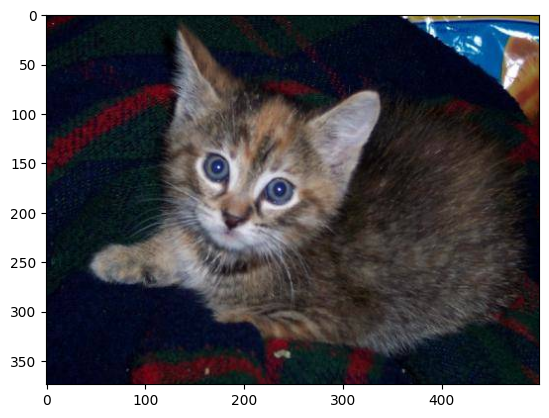

In [5]:
cat_img = mpimg.imread('/content/dataset/training_set/cats/cat.3929.jpg')
plt.imshow(cat_img)

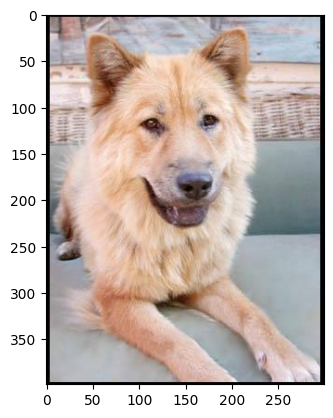

In [6]:
dog_img = mpimg.imread('/content/dataset/training_set/dogs/dog.786.jpg')
plt.imshow(dog_img)

In [7]:
os.mkdir('/content/dataset/training_set/cat_resized_images')
os.mkdir('/content/dataset/training_set/dog_resized_images')

In [8]:
cat_original_folder = '/content/dataset/training_set/cats/'
cat_resized_folder = '/content/dataset/training_set/cat_resized_images/'

filenames = os.listdir(cat_original_folder)

for filename in filenames:

  img_path = cat_original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_path = cat_resized_folder + filename
  img.save(new_img_path)

In [9]:
dog_original_folder = '/content/dataset/training_set/dogs/'
dog_resized_folder = '/content/dataset/training_set/dog_resized_images/'

filenames = os.listdir(dog_original_folder)

for filename in filenames:

  img_path = dog_original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_path = dog_resized_folder + filename
  img.save(new_img_path)

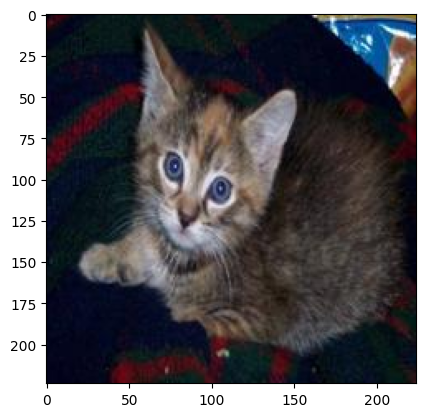

In [10]:
img = mpimg.imread('/content/dataset/training_set/cat_resized_images/cat.3929.jpg')
imgplt = plt.imshow(img)
plt.show()

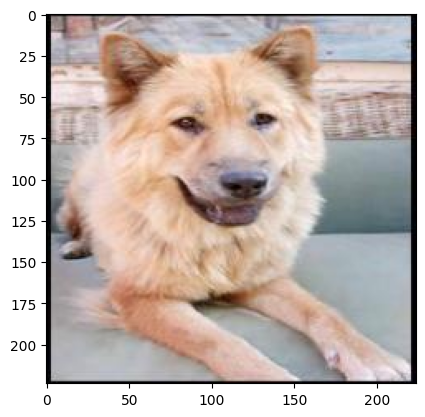

In [11]:
img = mpimg.imread('/content/dataset/training_set/dog_resized_images/dog.786.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
cat_filenames = os.listdir('/content/dataset/training_set/cat_resized_images/')

cat_labels = []

for cat_filename in cat_filenames:
  cat_labels.append(0)

dog_filenames = os.listdir('/content/dataset/training_set/dog_resized_images/')

dog_labels = []

for dog_filename in dog_filenames:
  dog_labels.append(1)

In [13]:
print(cat_labels[0:5])
print(len(cat_labels))

print(dog_labels[0:5])
print(len(dog_labels))

[0, 0, 0, 0, 0]
4000
[1, 1, 1, 1, 1]
4000


In [14]:
import cv2
import glob

In [15]:
cat_image_directory = '/content/dataset/training_set/cat_resized_images/'
cat_image_extension = ['png', 'jpg']

cat_files = []

[cat_files.extend(glob.glob(cat_image_directory + '*.' + e)) for e in cat_image_extension]

cat_images = np.asarray([cv2.imread(file) for file in cat_files])

print("Cat images shape:", cat_images.shape)

Cat images shape: (4000, 224, 224, 3)


In [16]:
dog_image_directory = '/content/dataset/training_set/dog_resized_images/'
dog_image_extension = ['png', 'jpg']

dog_files = []

[dog_files.extend(glob.glob(cat_image_directory + '*.' + e)) for e in dog_image_extension]

dog_images = np.asarray([cv2.imread(file) for file in dog_files])

print("Dog images shape:", dog_images.shape)

Dog images shape: (4000, 224, 224, 3)


In [17]:
type(cat_images)

numpy.ndarray

In [18]:
type(dog_images)

numpy.ndarray

In [19]:
X = np.concatenate((cat_images, dog_images), axis = 0)
Y = np.concatenate((cat_labels, dog_labels), axis = 0)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
print(X_train_scaled)
print(X_test_scaled)

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet, input_shape = (224, 224, 3), trainable = False)

In [ ]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
model.fit(X_train_scaled, Y_train, epochs = 5, batch_size = 8)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

In [ ]:
y_pred = model.predict(X_test_scaled)

print('Accuracy_score:', np.argmax(accuracy_score(y_pred)), axis = 0)

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

print(input_pred_label)